In [5]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [7]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [8]:
# Loading the dataset
df = pd.read_csv('heart.csv')

In [9]:
# Returns number of rows and columns of the dataset
df.shape
# Returns an object with all of the column headers
df.columns
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes
# Returns the first x number of rows when head(x). Without a number it returns 5
df.head()
# Returns the last x number of rows when tail(x). Without a number it returns 5
df.tail()
# Returns true for a column having null values, else false
df.isnull().any()
# Returns basic information on all columns
df.info()
# Returns basic statistics on numeric columns
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
# Importing essential libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/tmp/ipython-input-1840251571.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)


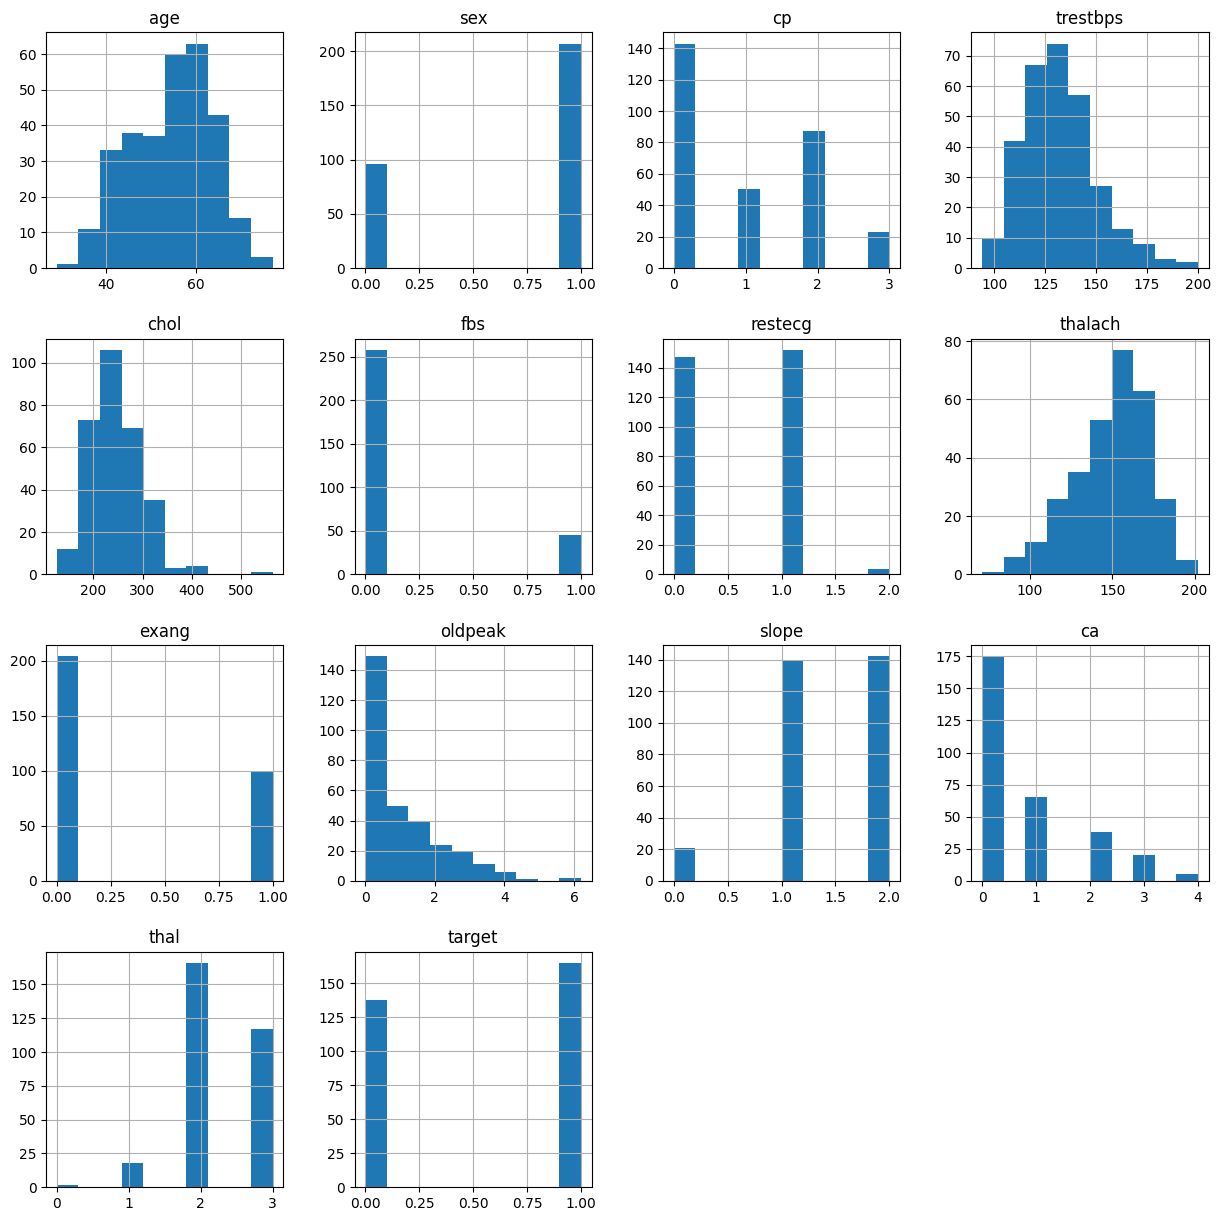

In [11]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

Text(0, 0.5, 'Count')

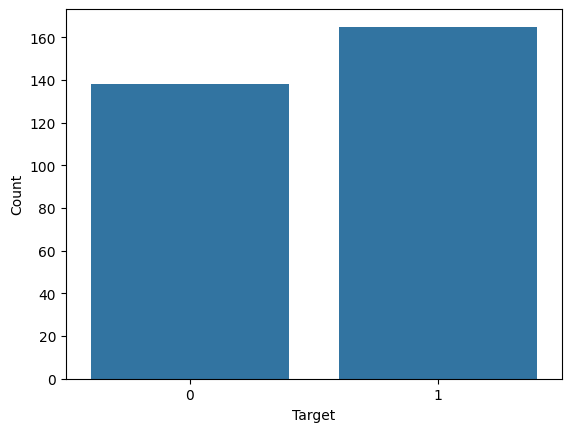

In [12]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Count')

<Axes: >

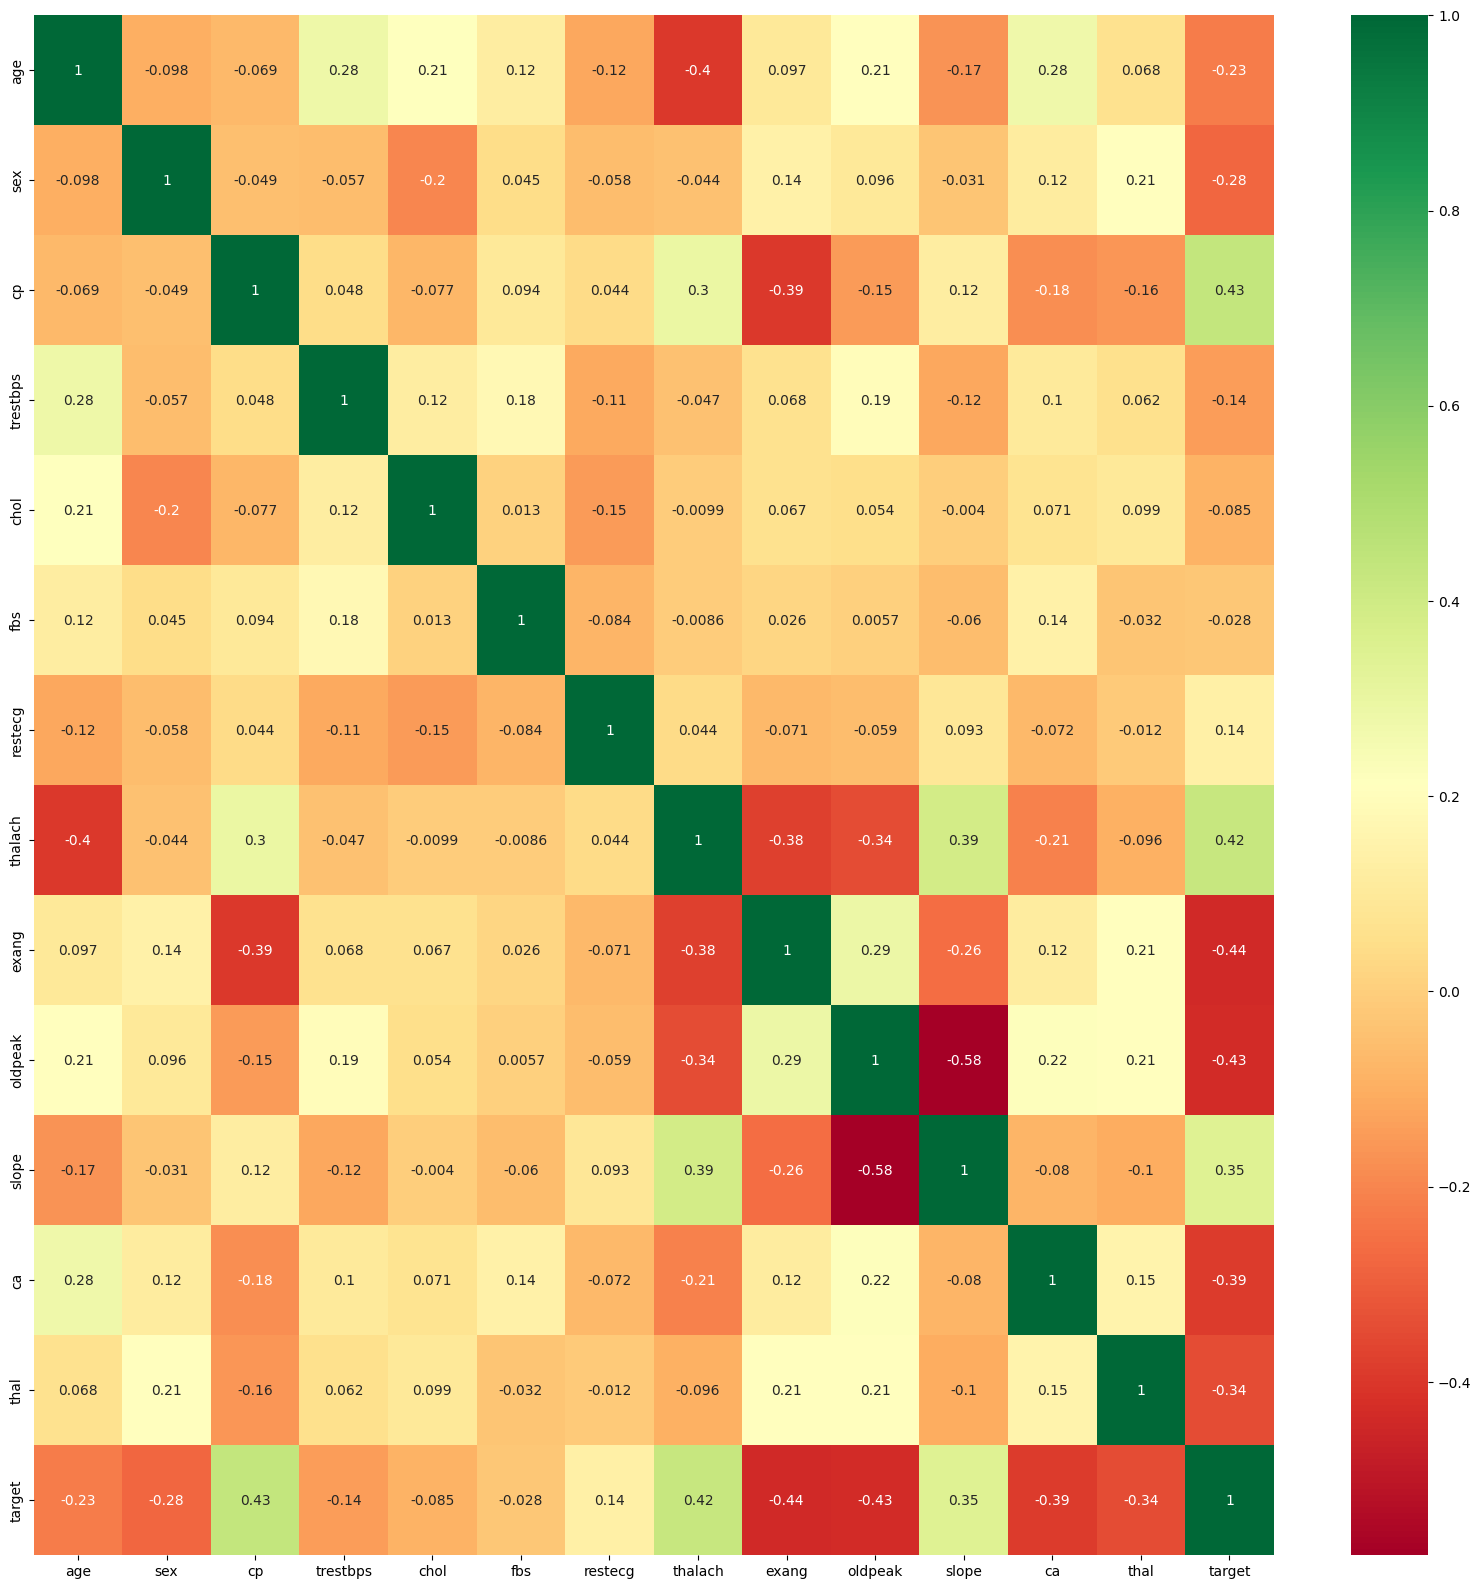

In [13]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [14]:
dataset = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])

In [16]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [17]:
# Splitting the dataset into dependent and independent features
X = dataset.drop('target', axis=1)
y = dataset['target']

In [ ]:
#KNN

In [18]:
# Importing essential libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [19]:
# Finding the best accuracy for knn algorithm using cross_val_score
knn_scores = []
for i in range(1, 21):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  cvs_scores = cross_val_score(knn_classifier, X, y, cv=10)
  knn_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

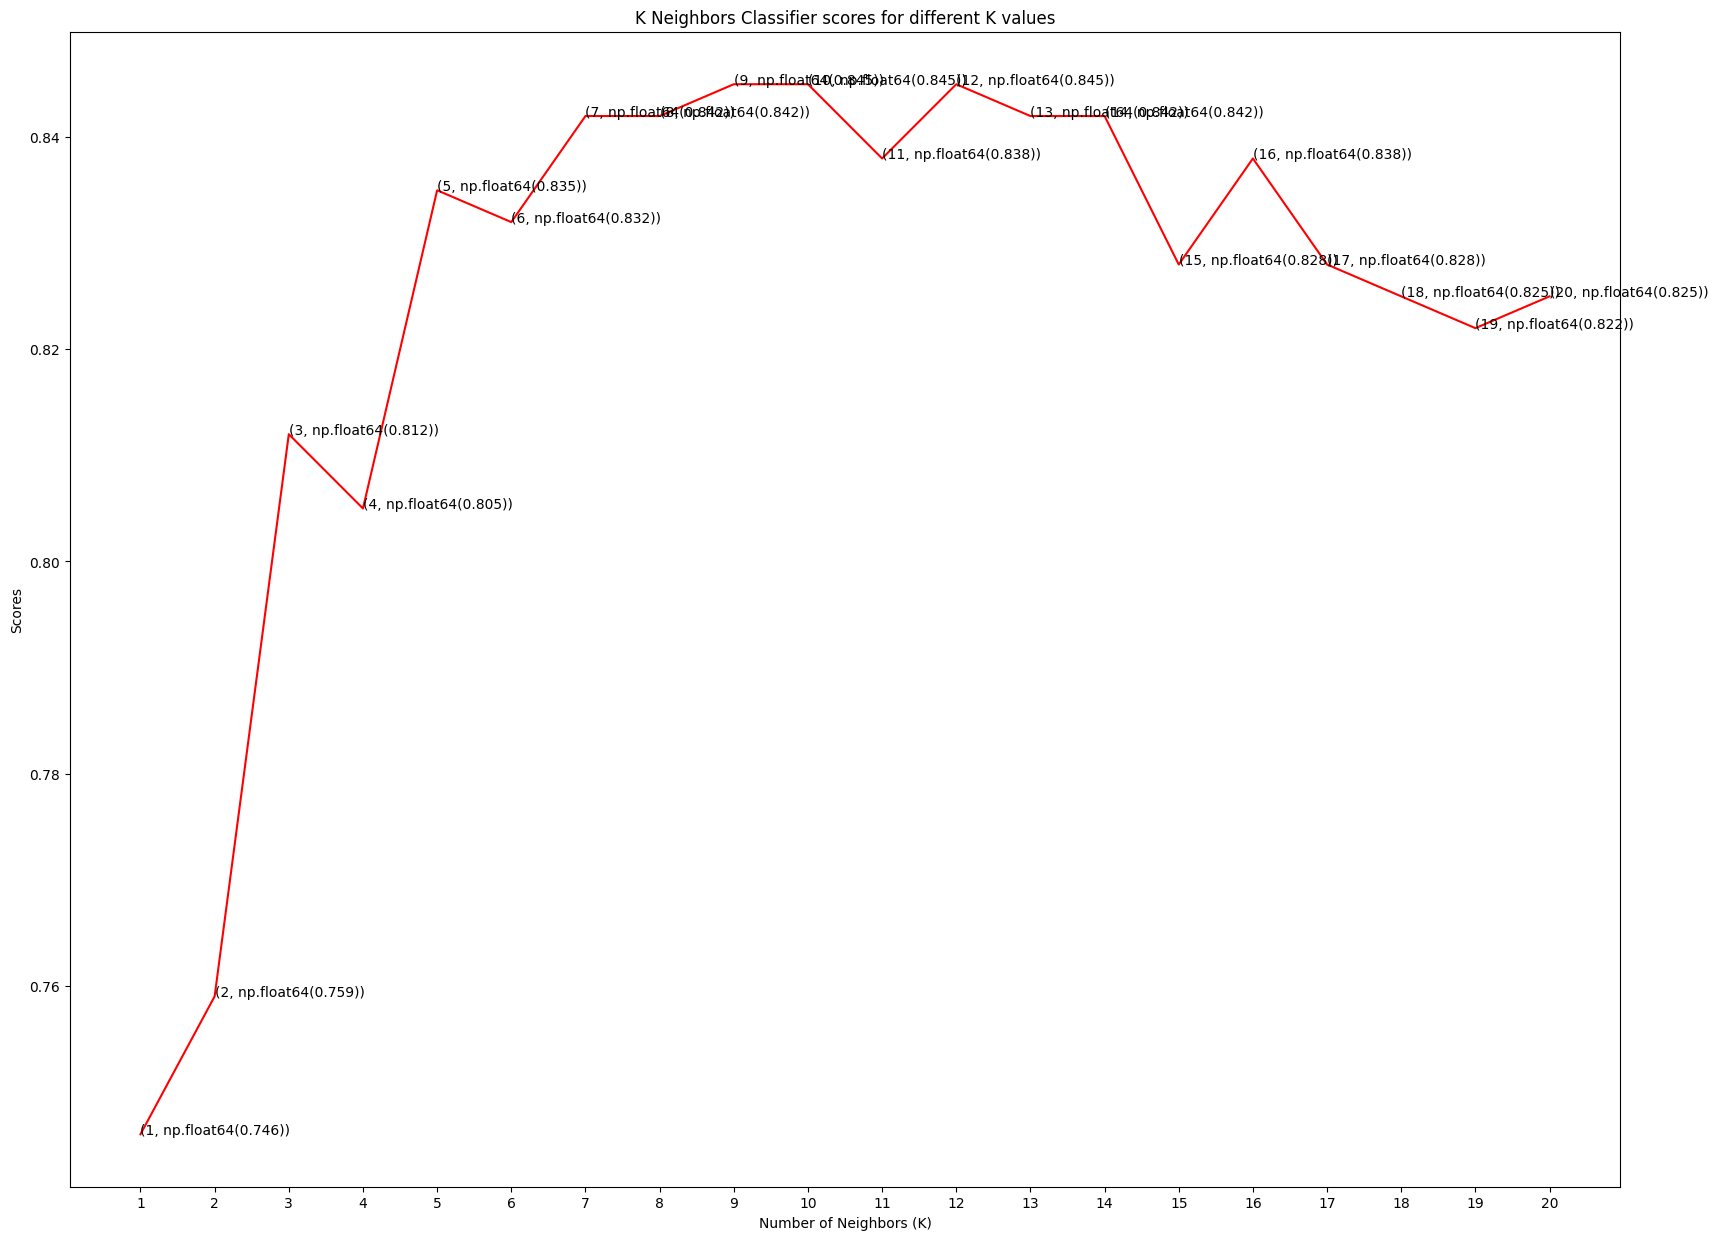

In [20]:
# Plotting the results of knn_scores
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [21]:
# Training the knn classifier model with k value as 12
knn_classifier = KNeighborsClassifier(n_neighbors=12)
cvs_scores = cross_val_score(knn_classifier, X, y, cv=10)
print("KNeighbours Classifier Accuracy with K=12 is: {}%".format(round(cvs_scores.mean(), 4)*100))

KNeighbours Classifier Accuracy with K=12 is: 84.48%


In [ ]:
#Decision Tree Classifier

In [22]:
# Importing essential libraries
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Finding the best accuracy for decision tree algorithm using cross_val_score
decision_scores = []
for i in range(1, 11):
  decision_classifier = DecisionTreeClassifier(max_depth=i)
  cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
  decision_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

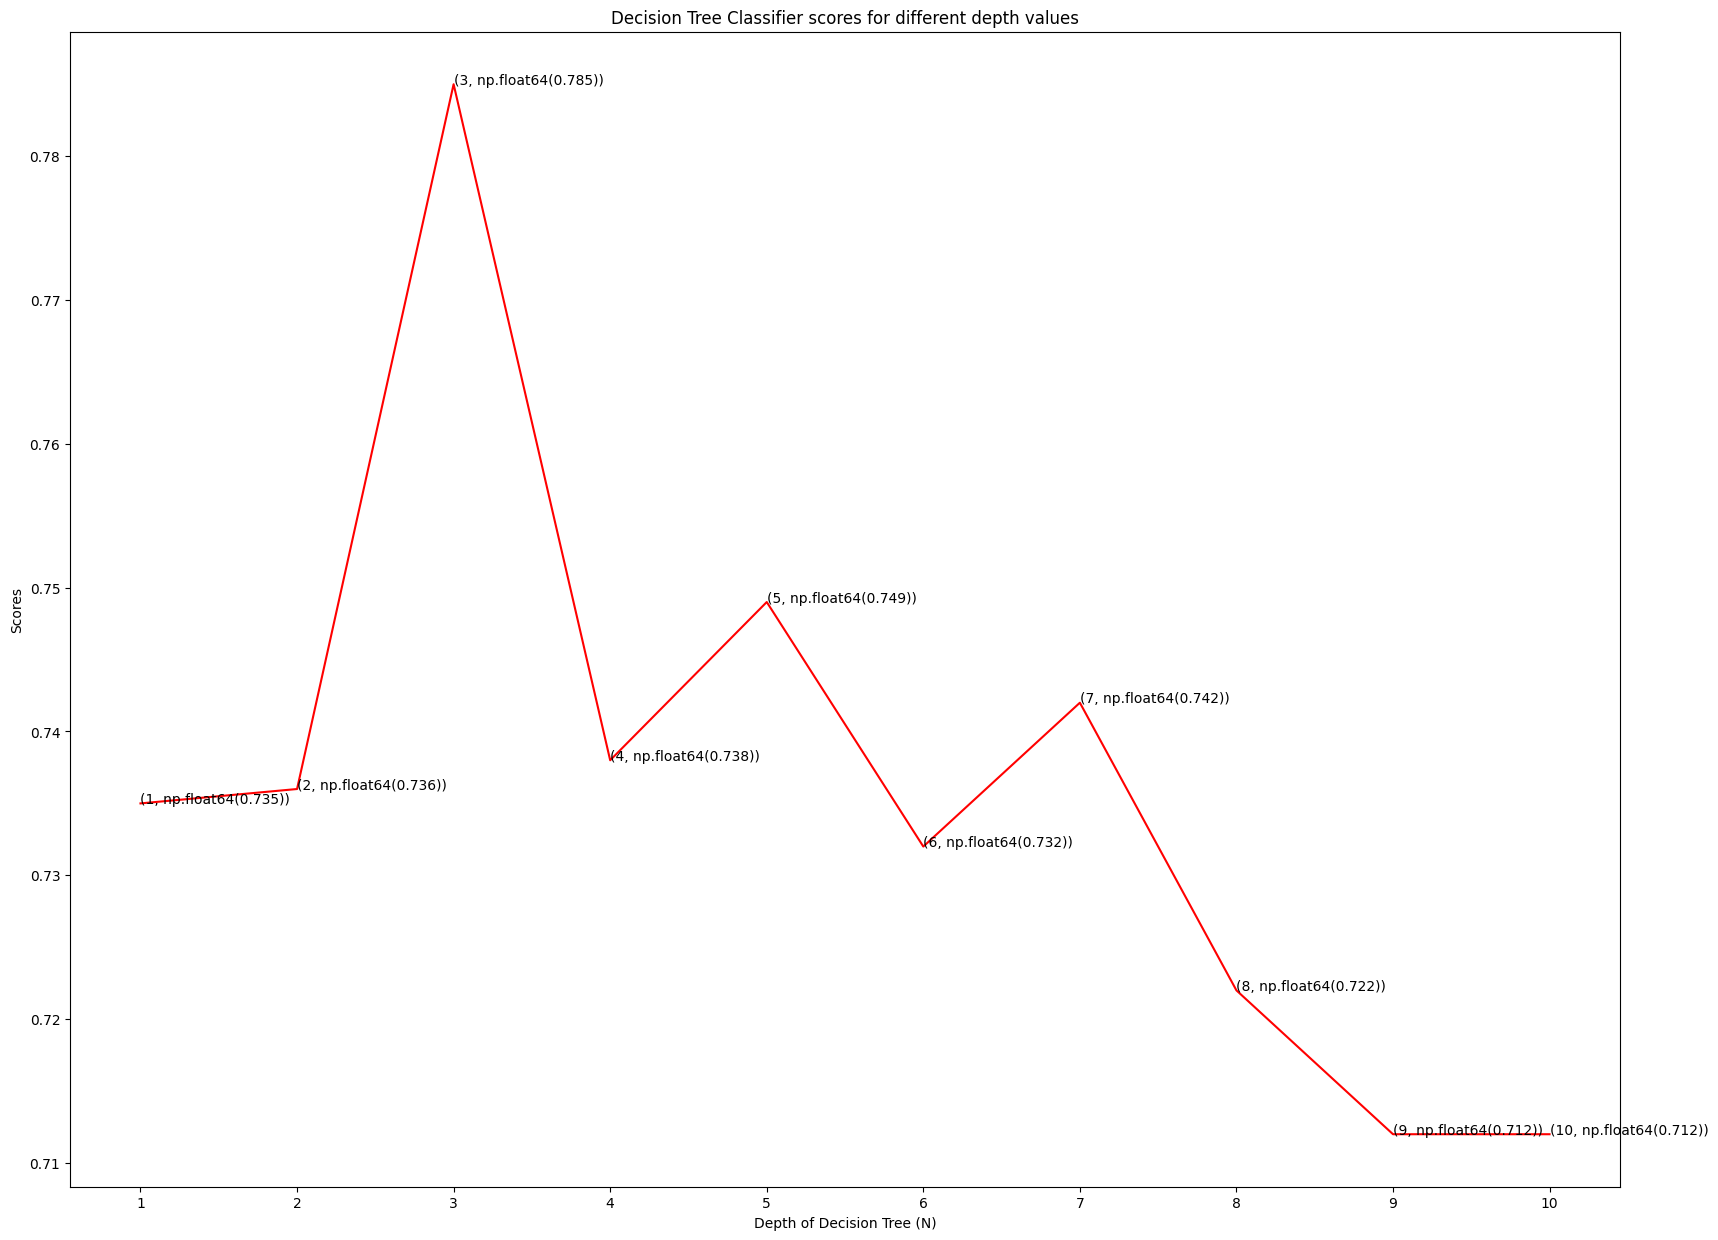

In [24]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], decision_scores, color = 'red')
for i in range(1,11):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')

In [25]:
# Training the decision tree classifier model with max_depth value as 3
decision_classifier = DecisionTreeClassifier(max_depth=3)
cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
print("Decision Tree Classifier Accuracy with max_depth=3 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Decision Tree Classifier Accuracy with max_depth=3 is: 78.51%


In [ ]:
#Random Forest Claasifier

In [26]:
# Importing essential libraries
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Finding the best accuracy for random forest algorithm using cross_val_score
forest_scores = []
for i in range(10, 101, 10):
  forest_classifier = RandomForestClassifier(n_estimators=i)
  cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
  forest_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

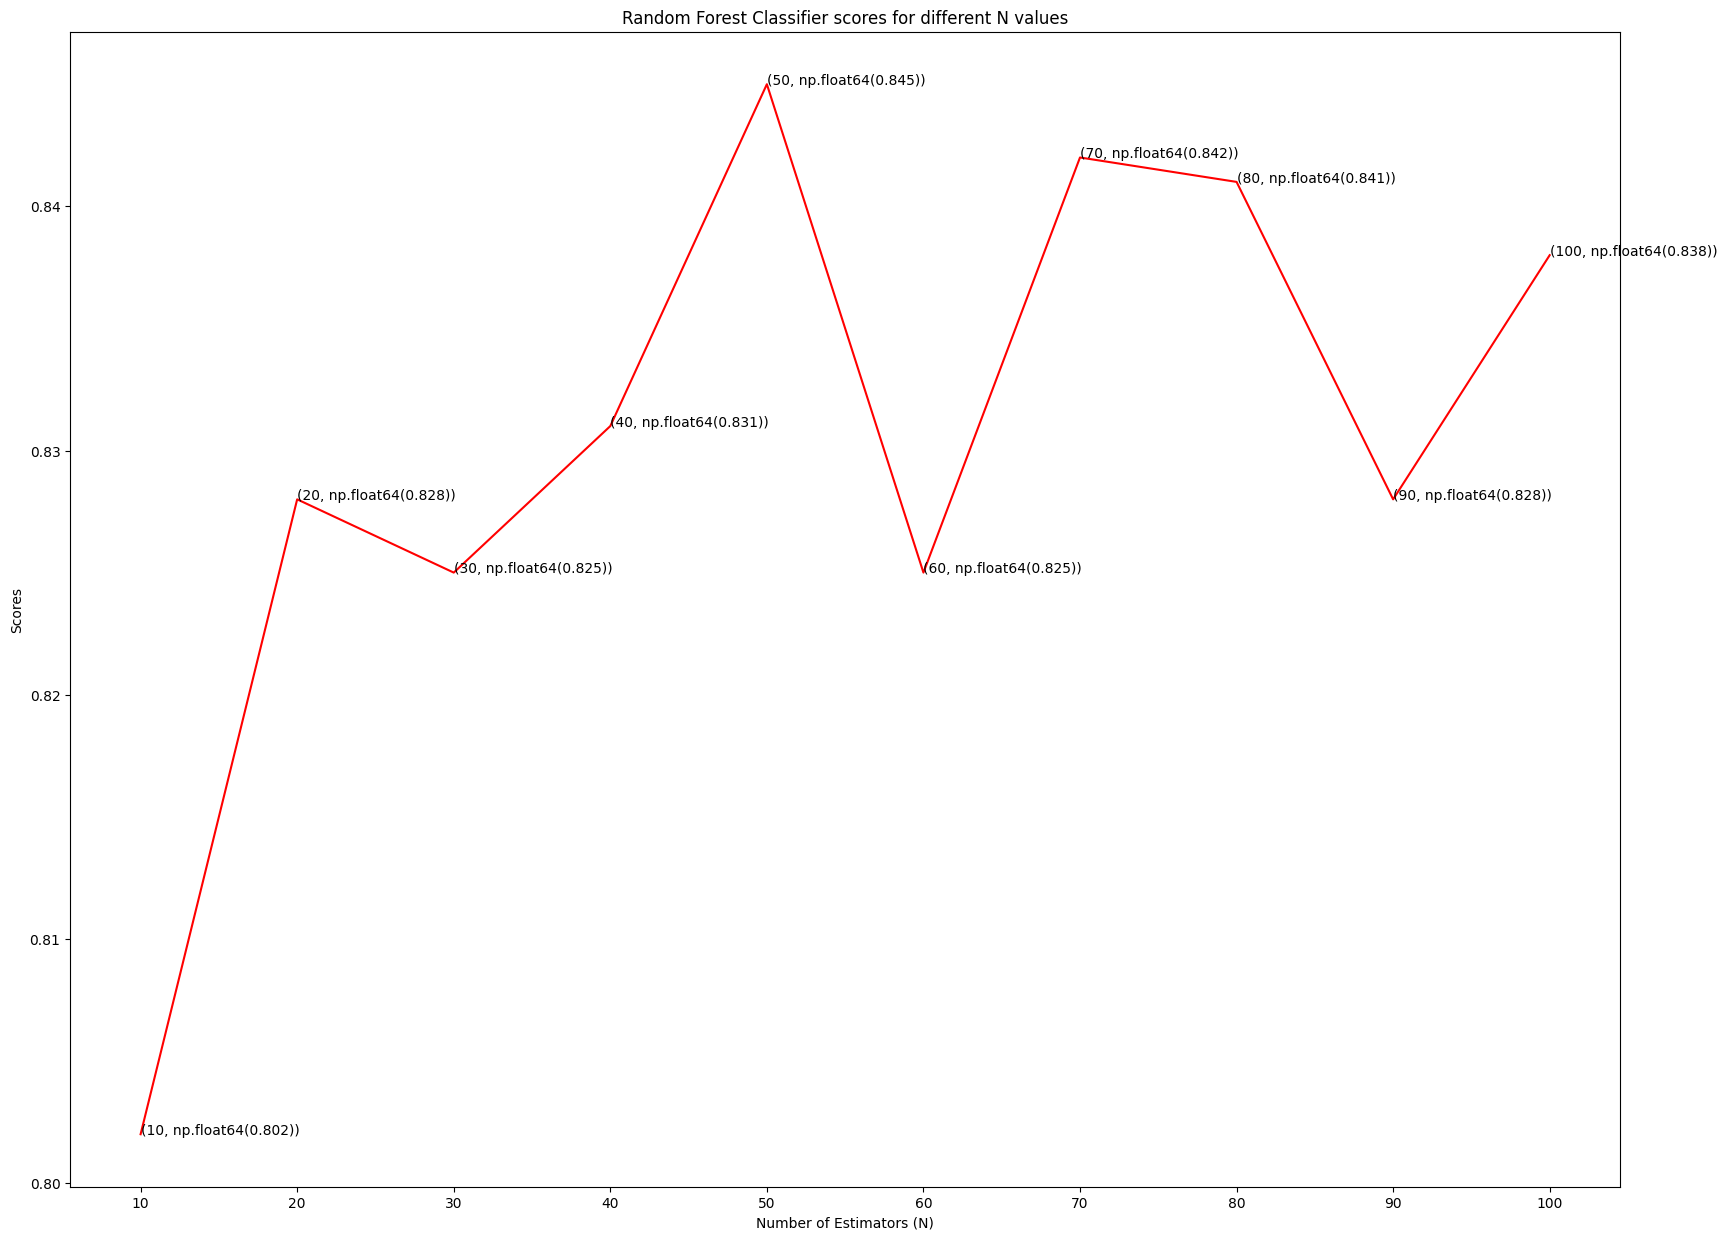

In [28]:
# Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

In [29]:
# Training the random forest classifier model with n value as 90
forest_classifier = RandomForestClassifier(n_estimators=90)
cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
print("Random Forest Classifier Accuracy with n_estimators=90 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Random Forest Classifier Accuracy with n_estimators=90 is: 83.16%


In [30]:
# --- GRADIO INTERFACE ---

import gradio as gr
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# ✅ Reuse preprocessing steps from your notebook
# (Make sure 'dataset' and 'X' are already defined above)
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
scaler.fit(dataset[columns_to_scale])

# Train the RandomForestClassifier (you can replace with your trained model)
model = RandomForestClassifier(n_estimators=90)
model.fit(X, y)

# ✅ Define prediction function
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach,
                          exang, oldpeak, slope, ca, thal):
    # Create input DataFrame
    input_data = pd.DataFrame({
        'age': [age],
        'trestbps': [trestbps],
        'chol': [chol],
        'thalach': [thalach],
        'oldpeak': [oldpeak],
        'sex': [sex],
        'cp': [cp],
        'fbs': [fbs],
        'restecg': [restecg],
        'exang': [exang],
        'slope': [slope],
        'ca': [ca],
        'thal': [thal]
    })

    # One-hot encoding to match training dataset
    input_data = pd.get_dummies(input_data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
    input_data = input_data.reindex(columns=X.columns, fill_value=0)

    # Scale numeric features
    input_data[columns_to_scale] = scaler.transform(input_data[columns_to_scale])

    # Predict
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    result = "🩺 Heart Disease Detected" if prediction == 1 else "💚 No Heart Disease Detected"
    return f"{result}\n\nPrediction Probability: {probability:.2f}"

# ✅ Gradio UI Design
interface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(label="Age"),
        gr.Dropdown(choices=[0, 1], label="Sex (0 = Female, 1 = Male)"),
        gr.Dropdown(choices=[0, 1, 2, 3], label="Chest Pain Type (0–3)"),
        gr.Number(label="Resting Blood Pressure (trestbps)"),
        gr.Number(label="Serum Cholesterol (chol)"),
        gr.Dropdown(choices=[0, 1], label="Fasting Blood Sugar > 120 mg/dl (1=True, 0=False)"),
        gr.Dropdown(choices=[0, 1, 2], label="Resting ECG Results (0–2)"),
        gr.Number(label="Maximum Heart Rate Achieved (thalach)"),
        gr.Dropdown(choices=[0, 1], label="Exercise Induced Angina (1=True, 0=False)"),
        gr.Number(label="ST Depression (oldpeak)"),
        gr.Dropdown(choices=[0, 1, 2], label="Slope of Peak Exercise ST Segment (0–2)"),
        gr.Dropdown(choices=[0, 1, 2, 3, 4], label="Number of Major Vessels (ca)"),
        gr.Dropdown(choices=[0, 1, 2, 3], label="Thalassemia (thal)")
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="❤️ Heart Disease Prediction",
    description="Enter patient medical details to predict the likelihood of heart disease using a trained ML model."
)

# ✅ Launch the app
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://861f158d186bd3123d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
